# Logistic Regression

1. -- Employee Retention Dataset - https://www.kaggle.com/giripujar/hr-analytics
2. -- Predicting the label - left (0,1), a Binary Classification

#  Task 1: Importing basic libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Task 2: Importing basic libraries

In [25]:
# Loading the dataset
df = pd.read_csv('/Users/priyashaprasad/Documents/Summer Analytics Course/SLR/HR_comma_sep.csv')

In [26]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.shape

(14999, 10)

The dataset consists of 14999 records/observations and 10 columns

# Task 3: Rearranging the columns in the dataset

Rearranging the columns in the dataset using pandas - to place the column left(to be predcited) as the last column

In [29]:
emp_ret = df.drop(['left'], axis =1)

In [30]:
emp_ret.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [31]:
emp_ret.shape

(14999, 9)

The column 'left' has been dropped

The column 'left' as a separate df

In [32]:
df2 = df[['left']]

In [35]:
df2.head()

,left
0,1
1,1
2,1
3,1
4,1


In [36]:
df2.shape

(14999, 1)

Adding the column 'left' to the dataset - as the last column

In [38]:
emp_ret['left'] = df2[['left']]

In [39]:
emp_ret.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [41]:
emp_ret.shape

(14999, 10)

Now we have the final dataset in an order that is convenient to conduct our analysis.

# Task 4 : Initial Analysis to understand the dataset

In [45]:
emp_ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [47]:
emp_ret.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salary                   0
left                     0
dtype: int64

In [48]:
emp_ret.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salary                   0
left                     0
dtype: int64

In [49]:
emp_ret.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [50]:
emp_ret.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [51]:
emp_ret.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [52]:
emp_ret.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [53]:
emp_ret.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [67]:
emp_ret.time_spend_company.value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [54]:
emp_ret.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

# Observations 

1. No null values in the dataset
2. Numeric Variable
    1. satisfaction_level
    2. last_evaluation
    3. average_montly_hours
    4. time_spend_company
3. Catergorical Variable
    1. number_project (Nominal)
    2. Work_accident (Nominal)
    3. promotion_last_5years (Nominal)
    4. left (Nominal)
    5. Department (Nominal)
    6. salary (Ordinal)
    

# Task 5 : Exploratory Data Analysis

In [63]:
emp_ret.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

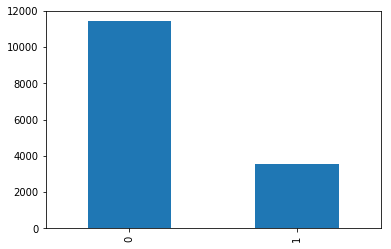

In [64]:
emp_ret['left'].value_counts().plot(kind='bar')

We could see that the majority of the people stayed with the firm

# Impact of numerical variables on the employee retention

In [66]:
emp_ret.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Observations 

1. 'satisfaction_level' seems to be relatively low (0.44) in employees who are leaving the firm in comparison with  the retained employees (0.66)
2. 'average_montly_hours' are relatively higher for employees who left the firm in comparison with the employees who stayed with the firm
3. There is no significant difference between the two classes on the 'time_spend_company' and 'last_evaluation'

# Impact of categorical variables on the employee retention

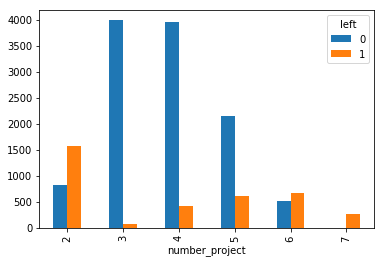

In [72]:
# number_project

pd.crosstab(emp_ret.number_project,emp_ret.left).plot(kind='bar')


#Observations

1. In project numbers 3,4,5 the employee retention is high, meaning that the many people stayed with the company 
and only a few left
2. In contrast to the above, in project numbers 2,6 and 7, more employees left the company, in comparison to the 
employees who stayed with the company.
3. It seems like all the employees in the Project number 7 left the company

In [73]:
emp_ret.groupby('left').number_project.value_counts()

left  number_project
0     3                 3983
      4                 3956
      5                 2149
      2                  821
      6                  519
1     2                 1567
      6                  655
      5                  612
      4                  409
      7                  256
      3                   72
Name: number_project, dtype: int64

In [74]:
emp_ret.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

The above numbers show that all the 256 employees of Project number 7 have left the company

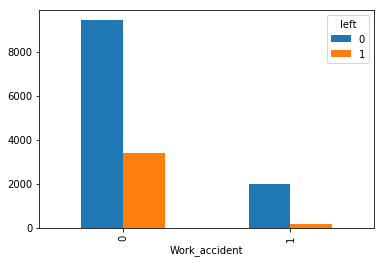

In [76]:
# work_accident

pd.crosstab(emp_ret.Work_accident,emp_ret.left).plot(kind='bar')

In both the (0,1) cases of Work_accident, more employees have stayed with the firm in comparison to the ones that have
left the company.

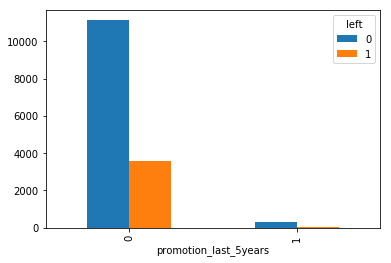

In [80]:
# promotion_last_5years

pd.crosstab(emp_ret.promotion_last_5years,emp_ret.left).plot(kind='bar')

In both the (0,1) cases of promotion_last_5years, more employees have stayed with the firm in comparison to the ones that have left the company.

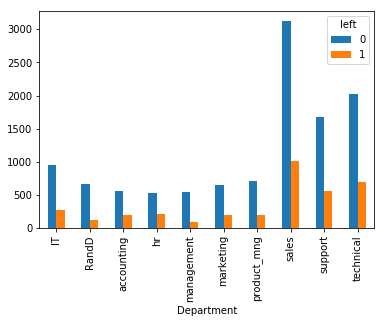

In [81]:
# Department
pd.crosstab(emp_ret.Department,emp_ret.left).plot(kind='bar')

It seems like there are no visible trends that could be observed in the department wise analysis of people
who left the organisationa in comparison with the number of people who stayed with the organisation

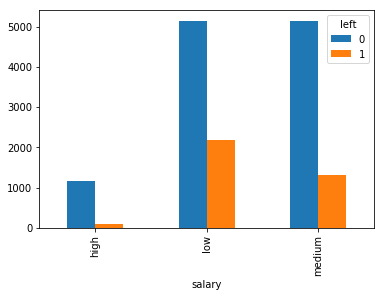

In [188]:
# Salary
pd.crosstab(emp_ret.salary,emp_ret.left).plot(kind='bar')

#Observations

Ranking based on the number of people who left the organisation among the three salary scales would be
    1. low
    2. medium
    3. high
    
It seems like, many people in the low salary scale left the organisation, in comparison to that of the people from
a higher salary scale who left the organisation.

So as a result of our EDA, we take the 'satisfaction_level', 'average_montly_hours', 'number_project', 'salary'
as independent variables to predict the 'left' label

# Task 6 Preparing the data 

In [189]:
subset = emp_ret[['satisfaction_level','average_montly_hours','number_project','salary']]
subset.head()

,satisfaction_level,average_montly_hours,number_project,salary
0,0.38,157,2,low
1,0.80,262,5,medium
2,0.11,272,7,medium
3,0.72,223,5,low
4,0.37,159,2,low


1. salary is an ordinal categorical variable 
2. number_project is a nominal categorical variable

So changing the value of the number_project series from numeric to character 

In [190]:
subset['number_project'] [subset.number_project == 7] = 'seven'
subset['number_project'] [subset.number_project == 6] = 'six'
subset['number_project'] [subset.number_project == 5] = 'five'
subset['number_project'] [subset.number_project == 4] = 'four'
subset['number_project'] [subset.number_project == 3] = 'three'
subset['number_project'] [subset.number_project == 2] = 'two'

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/lib/python2.7/site-p

In [191]:
subset.head()

,satisfaction_level,average_montly_hours,number_project,salary
0,0.38,157,two,low
1,0.80,262,five,medium
2,0.11,272,seven,medium
3,0.72,223,five,low
4,0.37,159,two,low


Now, the number project has 6 nominal categorical variables.

In [192]:
subset.number_project.value_counts()

four     4365
three    4055
five     2761
two      2388
six      1174
seven     256
Name: number_project, dtype: int64

Encoding the salary - ordinal categorical variable

In [164]:
subset_dummies = pd.get_dummies(subset["salary"],prefix='salary',drop_first=True)

In [165]:
subset_dummies.head()

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


Concatenating the encoded features to the dataset and dropping the original salary column

In [166]:
subset = pd.concat([subset,subset_dummies],axis = 'columns')

In [168]:
subset.head()

,satisfaction_level,average_montly_hours,number_project,salary,salary_low,salary_medium
0,0.38,157,two,low,1,0
1,0.80,262,five,medium,0,1
2,0.11,272,seven,medium,0,1
3,0.72,223,five,low,1,0
4,0.37,159,two,low,1,0


In [170]:
subset.drop('salary',axis=1,inplace=True)

In [171]:
subset.head()

,satisfaction_level,average_montly_hours,number_project,salary_low,salary_medium
0,0.38,157,two,1,0
1,0.80,262,five,0,1
2,0.11,272,seven,0,1
3,0.72,223,five,1,0
4,0.37,159,two,1,0


Encoding the number_project - nominal categorical variable

In [172]:
subset_dummies2 = pd.get_dummies(subset["number_project"],prefix='project',drop_first=True)

In [173]:
subset_dummies2.head()

,project_four,project_seven,project_six,project_three,project_two
0,0,0,0,0,1
1,0,0,0,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


Concatenating the encoded features to the dataset and dropping the original number_project column

In [174]:
subset = pd.concat([subset,subset_dummies2],axis = 'columns')

In [175]:
subset.head()

,satisfaction_level,average_montly_hours,number_project,salary_low,salary_medium,project_four,project_seven,project_six,project_three,project_two
0,0.38,157,two,1,0,0,0,0,0,1
1,0.80,262,five,0,1,0,0,0,0,0
2,0.11,272,seven,0,1,0,1,0,0,0
3,0.72,223,five,1,0,0,0,0,0,0
4,0.37,159,two,1,0,0,0,0,0,1


In [176]:
subset.drop('number_project',axis=1,inplace=True)

In [177]:
subset.head()

,satisfaction_level,average_montly_hours,salary_low,salary_medium,project_four,project_seven,project_six,project_three,project_two
0,0.38,157,1,0,0,0,0,0,1
1,0.80,262,0,1,0,0,0,0,0
2,0.11,272,0,1,0,1,0,0,0
3,0.72,223,1,0,0,0,0,0,0
4,0.37,159,1,0,0,0,0,0,1


In [178]:
X = subset
X.head()

,satisfaction_level,average_montly_hours,salary_low,salary_medium,project_four,project_seven,project_six,project_three,project_two
0,0.38,157,1,0,0,0,0,0,1
1,0.80,262,0,1,0,0,0,0,0
2,0.11,272,0,1,0,1,0,0,0
3,0.72,223,1,0,0,0,0,0,0
4,0.37,159,1,0,0,0,0,0,1


In [179]:
y = emp_ret.left

In [180]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

# Task 7: Splitting the dataset

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [195]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11999, 9)
(3000, 9)
(11999,)
(3000,)


# Task 8 : Creating the logistic regression model

In [182]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [184]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Task 9 : Predicting the test data

In [197]:
y_pred = model.predict(X_test)

In [198]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

In [200]:
model.score(X_train,y_train)

0.8669055754646221

The mean accuracy of our model in the training set is 87%%

In [201]:
model.score(X_test,y_test)

0.864

The mean accuracy of our model in the training set is 86.4%

In [202]:
model.predict_proba(X_test)

array([[0.97363398, 0.02636602],
       [0.42037374, 0.57962626],
       [0.45695878, 0.54304122],
       ...,
       [0.82066344, 0.17933656],
       [0.83644896, 0.16355104],
       [0.9737066 , 0.0262934 ]])

The predict_proba method gives the probabilities between two classes - for each data point in the test data.
Meaning that - satisfaction_level = 0.56, average_montly_hours = 235, salary = medium, number_project =3,
the probability of this person staying with the company is 0.973 and
the probability of this person leaving the comapny is 0.026, and hence our model predicts the class to be 0


In [205]:
X_test.head()

,satisfaction_level,average_montly_hours,salary_low,salary_medium,project_four,project_seven,project_six,project_three,project_two
2480,0.56,235,0,1,0,0,0,1,0
12700,0.46,143,0,1,0,0,0,0,1
2539,0.68,274,1,0,0,0,1,0,0
4529,0.52,244,1,0,0,0,0,1,0
13631,0.78,275,1,0,1,0,0,0,0


Predicting the class by passing individual set of values as input

In [206]:
model.predict([[0.5,200,0,1,0,0,0,1,0]])

array([0])

In [207]:
model.predict([[0.4,150,0,1,0,0,0,0,1]])

array([1])